Classifying Emotions in Tweets: This project aims to classify emotions expressed in tweets using Natural Language Processing (NLP) techniques, with the goal of accurately predicting the sentiment behind social media posts. By developing a model capable of identifying emotions such as happiness, sadness, anger, and surprise, this project seeks to demonstrate the power of NLP in understanding public sentiment. Analyzing social media reactions is especially relevant in today's digital age, as it provides valuable insights into public opinion, enables businesses and organizations to better understand customer feedback, and enhances our understanding of societal trends and emotional responses during key events or topics.

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("simulated_tweet_emotions.csv")

In [3]:
# Show the first few rows
df.head()

,Tweet,Emotion
0,Just finished my favorite book 📚❤️,happy
1,Why is customer service always so useless?!,angry
2,I miss my old life 😢,sad
3,Can't believe this is happening again!!,angry
4,Why does everything always go wrong 😩,sad


In [4]:
import re
import string

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove numbers
    return text.strip()
df["Cleaned_Tweet"] = df["Tweet"].apply(clean_text)
df.head()

,Tweet,Emotion,Cleaned_Tweet
0,Just finished my favorite book 📚❤️,happy,just finished my favorite book
1,Why is customer service always so useless?!,angry,why is customer service always so useless
2,I miss my old life 😢,sad,i miss my old life
3,Can't believe this is happening again!!,angry,cant believe this is happening again
4,Why does everything always go wrong 😩,sad,why does everything always go wrong


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["Cleaned_Tweet"])

Train the model(Logistic regression)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
# Encode target labels
y = df["Emotion"]

In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        51
        calm       1.00      1.00      1.00        44
       happy       1.00      1.00      1.00        54
         sad       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [12]:
def predict_emotion(tweet):
    cleaned = clean_text(tweet)
    vec = vectorizer.transform([cleaned])
    return model.predict(vec)[0]

In [13]:
import joblib

# Save the model
joblib.dump(model, "emotion_model.pkl")

# Save the vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [14]:
# Try a sample
predict_emotion("I can't believe I lost my keys again 😡")

'angry'

In [15]:
predict_emotion("Just got a raise at work!! Feeling amazing 🎉💰")

'happy'

In [16]:
predict_emotion("I feel so lonely today... nothing is going right 😢")

'sad'

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

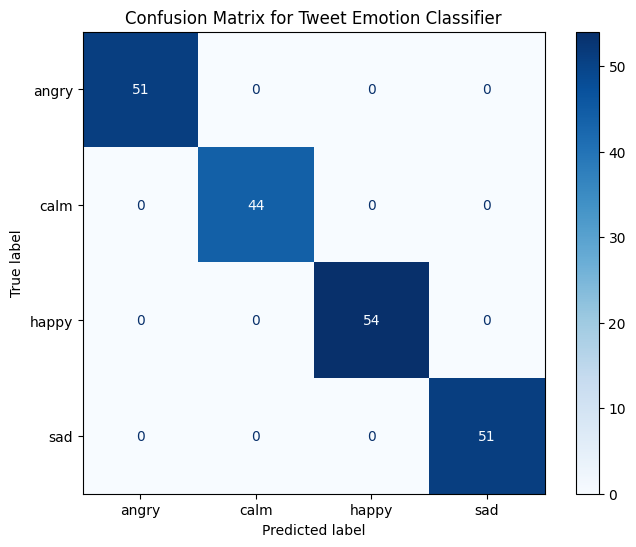

Model Accuracy: 100.00%


In [18]:
# Predict on test data
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot it
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Tweet Emotion Classifier")
plt.show()
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

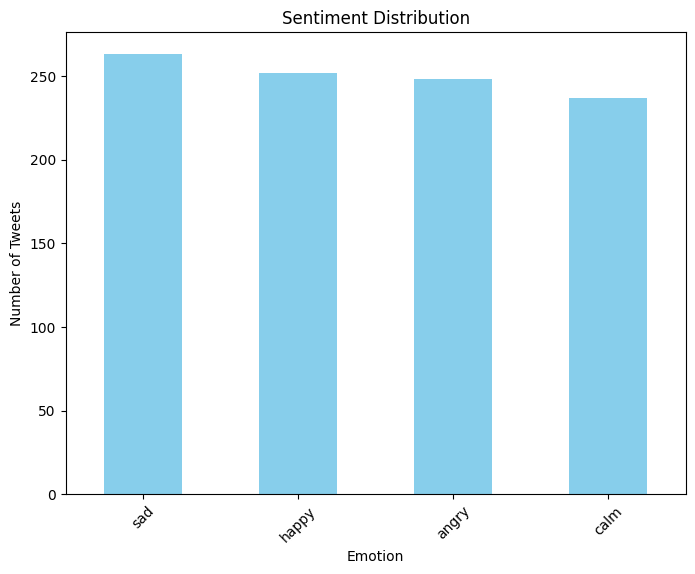

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion
emotion_counts = df['Emotion'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Sentiment Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
# Filter tweets with the "happy" emotion
happy_tweets = df[df["Emotion"] == "happy"]["Cleaned_Tweet"]

# Combine all tweets into one large string
text = " ".join(happy_tweets)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


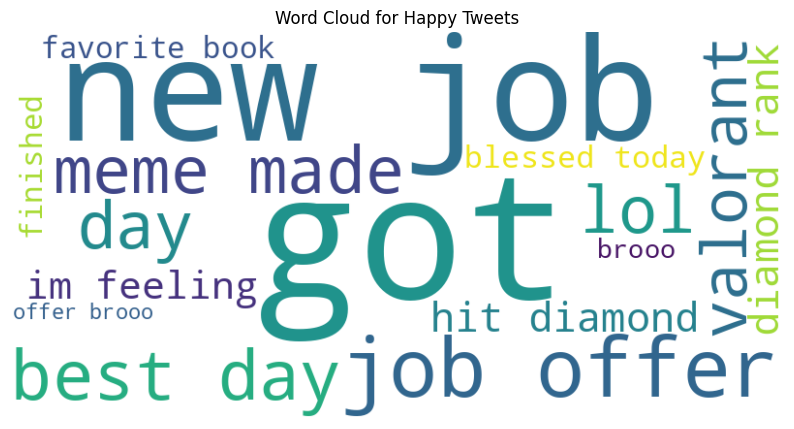

In [22]:
# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Happy Tweets")
plt.show()

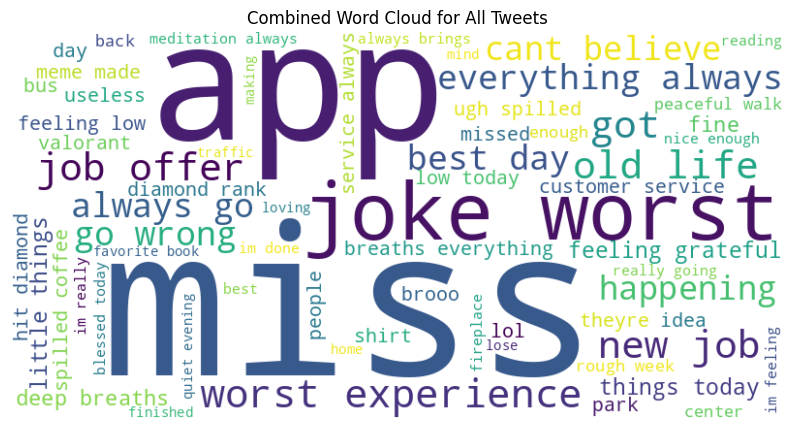

In [23]:
# Combine all tweets across all emotions
all_tweets = " ".join(df["Cleaned_Tweet"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_tweets)

# Plot the combined word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Combined Word Cloud for All Tweets")
plt.show()

In [24]:
import streamlit as st
import joblib

# Load your trained model and vectorizer
model = joblib.load("emotion_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Define your preprocessing (use the same one you used during training)
def preprocess_text(text):
    text = text.lower()
    return text

# Define the prediction function
def predict_emotion(text):
    processed = preprocess_text(text)
    vectorized = vectorizer.transform([processed])
    prediction = model.predict(vectorized)
    
    # Example label map (use your actual encoding)
    label_map = {0: "Happy", 1: "Sad", 2: "Angry", 3: "Surprised"}
    return label_map.get(prediction[0], "Unknown")

# Streamlit UI
st.title("Tweet Emotion Classifier")
tweet = st.text_area("Enter a tweet:")

if st.button("Predict Emotion"):
    result = predict_emotion(tweet)
    st.success(f"The predicted emotion is: **{result}**")

2025-04-09 14:42:57.165 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 14:42:58.934 
  command:

    streamlit run C:\Users\mon\exam\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-09 14:42:58.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 14:42:58.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 14:42:58.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 14:42:58.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 14:42:58.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 14:42:58.950 Session state does not functio